# 데이터 실수화

In [1]:
#범주형 자료
x=[{'city':'Paris','temp':1.0}, 
   {'city':'Seoul','temp':10.0}, 
   {'city':'Sydney', 'temp':20.0}]
x

[{'city': 'Paris', 'temp': 1.0},
 {'city': 'Seoul', 'temp': 10.0},
 {'city': 'Sydney', 'temp': 20.0}]

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)
vec.fit_transform(x) #X를 범주형 수량화 자료로 변환

array([[ 1.,  0.,  0.,  1.],
       [ 0.,  1.,  0., 10.],
       [ 0.,  0.,  1., 20.]])

In [3]:
vec1=DictVectorizer(sparse=True) #메모리를 줄임(디폴트옵션)
x1=vec1.fit_transform(x)
x1

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [4]:
#텍스트 자료
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vec2=CountVectorizer() #sparse=True(디폴트옵션)
t=vec2.fit_transform(text).toarray() #sparse=True를 풀고 text를 수량화 배열 자료로 변환

import pandas as pd
t1=pd.DataFrame(t, columns=vec2.get_feature_names_out())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer() #sparse=True(디폴트옵션)
x2=tfid.fit_transform(text).toarray() #sparse=True를 풀고 text를 수량화 배열 자료로 변환
x3=pd.DataFrame(x2,columns=tfid.get_feature_names_out())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


# 데이터 정제

In [7]:
import numpy as np
# 결측자료
x_miss=np.array([[1,2,3,np.nan],
                 [5,np.NaN,7,8],
                 [np.nan,10,11,12],
                 [1,2,15,16],
                 [13,4,15,16]])
x_miss

array([[ 1.,  2.,  3., nan],
       [ 5., nan,  7.,  8.],
       [nan, 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

In [8]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy='mean')
im.fit_transform(x_miss) #열의 평균값으로 대체

array([[ 1. ,  2. ,  3. , 13. ],
       [ 5. ,  4.5,  7. ,  8. ],
       [ 5. , 10. , 11. , 12. ],
       [ 1. ,  2. , 15. , 16. ],
       [13. ,  4. , 15. , 16. ]])

In [9]:
im = SimpleImputer(strategy='median')
im.fit_transform(x_miss) #열의 중앙값으로 대체

array([[ 1.,  2.,  3., 14.],
       [ 5.,  3.,  7.,  8.],
       [ 3., 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

In [10]:
im = SimpleImputer(strategy='most_frequent')
im.fit_transform(x_miss) #열의 최빈값으로 대체

array([[ 1.,  2.,  3., 16.],
       [ 5.,  2.,  7.,  8.],
       [ 1., 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

In [11]:
im = SimpleImputer(strategy='constant')
im.fit_transform(x_miss) #0으로 대체

array([[ 1.,  2.,  3.,  0.],
       [ 5.,  0.,  7.,  8.],
       [ 0., 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

In [12]:
im = SimpleImputer(strategy='constant', fill_value=1)
im.fit_transform(x_miss) #1로 대체

array([[ 1.,  2.,  3.,  1.],
       [ 5.,  1.,  7.,  8.],
       [ 1., 10., 11., 12.],
       [ 1.,  2., 15., 16.],
       [13.,  4., 15., 16.]])

# 데이터 통합

- [데이터 다운로드](https://www.kaggle.com/c/rossmann-store-sales/data) 
- zip을 풀어서 파일을 colab에 업로드

In [13]:
import pandas as pd
df1=pd.read_csv("train.csv",engine='python')
print(df1.shape)
type(df1)

(83898, 9)


pandas.core.frame.DataFrame

In [14]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5.0,2015-07-31,5263.0,555.0,1.0,1.0,0,1.0
1,2,5.0,2015-07-31,6064.0,625.0,1.0,1.0,0,1.0
2,3,5.0,2015-07-31,8314.0,821.0,1.0,1.0,0,1.0
3,4,5.0,2015-07-31,13995.0,1498.0,1.0,1.0,0,1.0
4,5,5.0,2015-07-31,4822.0,559.0,1.0,1.0,0,1.0


In [15]:
df2=pd.read_csv("store.csv",engine='python')
df2.shape

(1115, 10)

In [16]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [17]:
df=pd.merge(df1,df2,on='Store')
df.shape

(83898, 18)

In [18]:
df.dtypes

Store                          int64
DayOfWeek                    float64
Date                          object
Sales                        float64
Customers                    float64
Open                         float64
Promo                        float64
StateHoliday                  object
SchoolHoliday                float64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [19]:
print(len(df['Store'].unique()))
print(len(df['Date'].unique()))
print(df['DayOfWeek'].value_counts())

1115
77
5.0    12265
4.0    12265
3.0    12265
2.0    12265
1.0    12265
7.0    11422
6.0    11150
Name: DayOfWeek, dtype: int64


In [20]:
import numpy as np
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df['Month']=df['Date'].dt.month
df['Quarter']=df['Date'].dt.quarter
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day
df['Week']=df['Date'].dt.isocalendar().week
df['Season']=np.where(df['Month'].isin([3,4,5]),'Spring',
                     np.where(df['Month'].isin([6,7,8]),'Summer',
                             np.where(df['Month'].isin([9,10,11]),'fall',
                                     np.where(df['Month'].isin([12,1,2]),'winter','None'))))
print(df[['Date','Year','Month','Day','Week','Quarter','Season']].head())

        Date    Year  Month   Day  Week  Quarter  Season
0 2015-07-31  2015.0    7.0  31.0    31      3.0  Summer
1 2015-07-30  2015.0    7.0  30.0    31      3.0  Summer
2 2015-07-29  2015.0    7.0  29.0    31      3.0  Summer
3 2015-07-28  2015.0    7.0  28.0    31      3.0  Summer
4 2015-07-27  2015.0    7.0  27.0    31      3.0  Summer


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f592dd94510>,
      dtype=object)

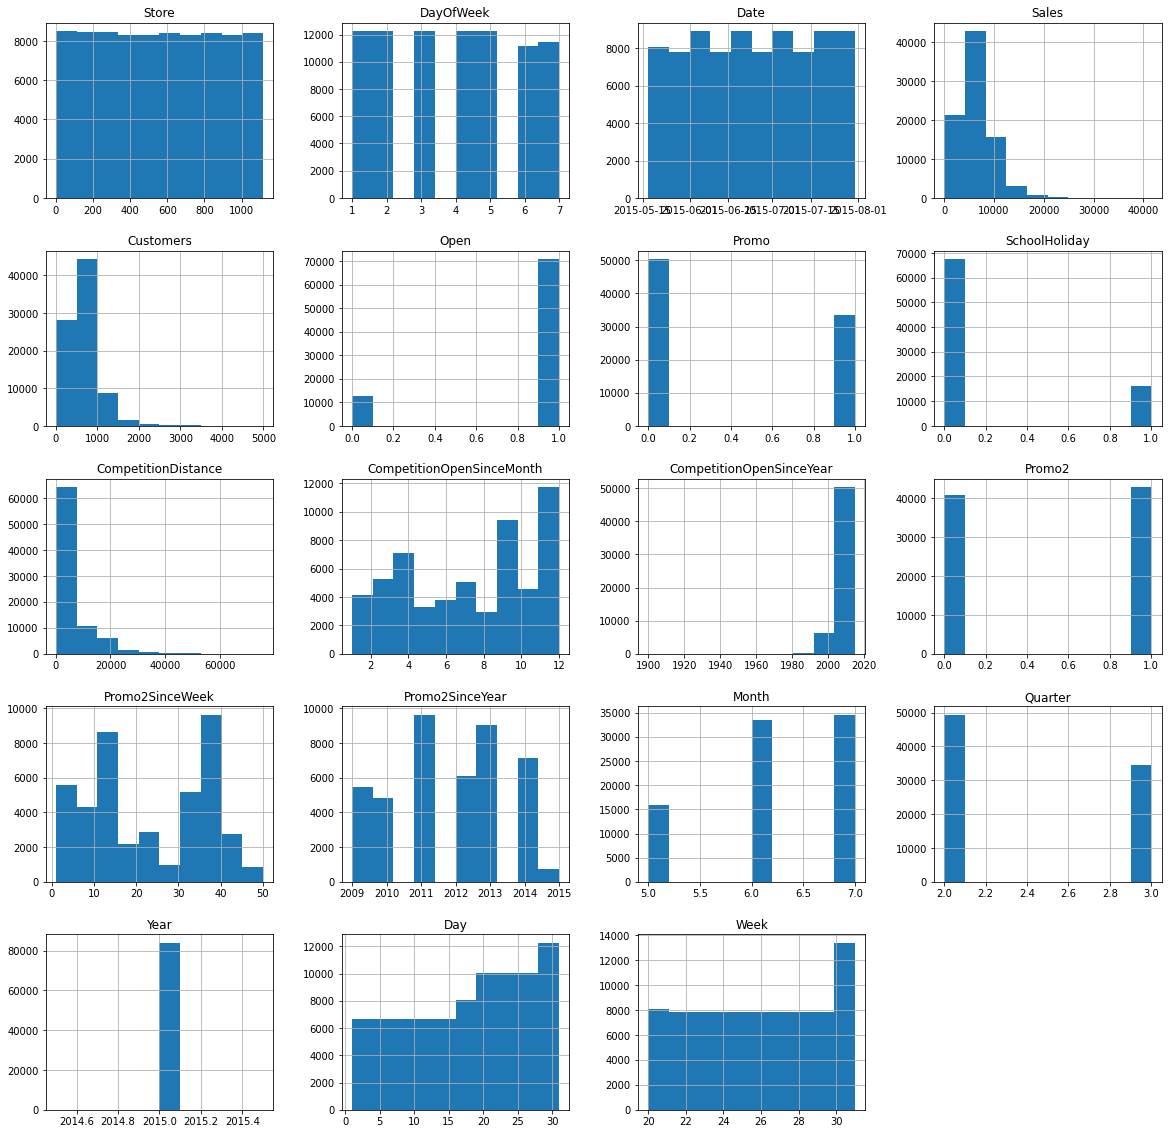

In [21]:
df.hist(figsize=(20,20))

In [22]:
df.isnull().sum()/df.shape[0]*100

Store                         0.000000
DayOfWeek                     0.001192
Date                          0.001192
Sales                         0.001192
Customers                     0.001192
Open                          0.001192
Promo                         0.001192
StateHoliday                  0.001192
SchoolHoliday                 0.001192
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.268183
CompetitionOpenSinceMonth    31.749267
CompetitionOpenSinceYear     31.749267
Promo2                        0.000000
Promo2SinceWeek              48.791390
Promo2SinceYear              48.791390
PromoInterval                48.791390
Month                         0.001192
Quarter                       0.001192
Year                          0.001192
Day                           0.001192
Week                          0.001192
Season                        0.000000
dtype: float64

# 데이터 불균형

In [23]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9], 
                           n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=10)

print('Original dataset shape %s' % Counter(y))  

Original dataset shape Counter({2: 180, 1: 14, 0: 6})


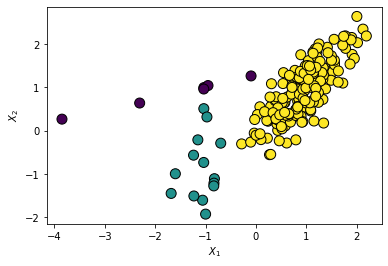

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [25]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 180, 1: 180, 0: 180})


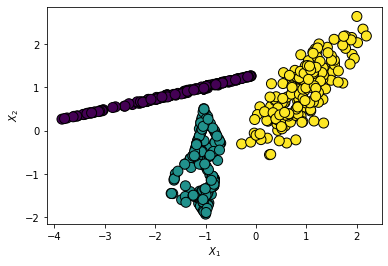

In [26]:
import matplotlib.pyplot as plt

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [27]:
ada=ADASYN(random_state=0)
X_syn,y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


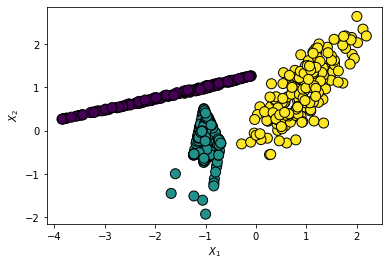

In [28]:
import matplotlib.pyplot as plt

plt.scatter(X_syn[:, 0], X_syn[:, 1], marker='o', c=y_syn,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [29]:
from imblearn.under_sampling import NearMiss

#Define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
#Transform the dataset
X_Under, y_Under = undersample.fit_resample(X, y)

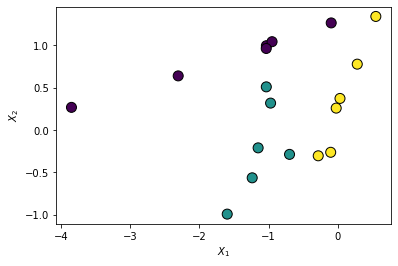

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,
            s=100, edgecolor="k", linewidth=1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()